# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [38]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

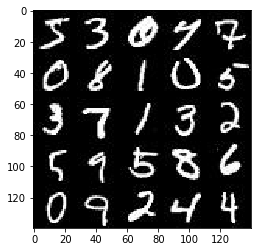

In [39]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

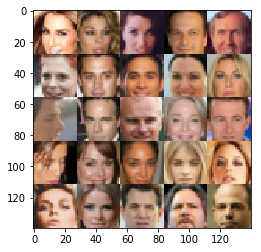

In [40]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/vincechan/anaconda/envs/dlnd/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [67]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, None)
    return (input_real, input_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [68]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function   
    with tf.variable_scope('discriminator', reuse=reuse):
        h_in = tf.contrib.layers.flatten(images)
        
        # hidden layer
        h1 = tf.layers.dense(h_in, 384)
        h1 = tf.maximum(h1 * 0.01, h1)
        
        h2 = tf.layers.dense(h1, 128)
        h2 = tf.maximum(h2 * 0.01, h2)
        
        #h3 = tf.layers.dense(h2, 84)
        #h3 = tf.maximum(h3 * 0.01, h3)
        
        h_out = h2
        
        logits = tf.layers.dense(h_out, 1)
        output = tf.sigmoid(logits)
    return (output, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [69]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function   
    with tf.variable_scope('generator', reuse=not is_train):
        h_in = z
        
        h1 = tf.layers.dense(h_in, 384)
        h1 = tf.maximum(h1 * 0.01, h1)
        
        h2 = tf.layers.dense(h1, 128)
        h2 = tf.maximum(h2 * 0.01, h2)
        
        #h3 = tf.layers.dense(h2, 84)
        #h3 = tf.maximum(h3 * 0.01, h3)
        
        h_out = h2
    
        logits = tf.layers.dense(h_out, 28*28*out_channel_dim)
        output = tf.tanh(logits)
        output = tf.reshape(output, (-1, 28,28,out_channel_dim))
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [70]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function

    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # calculate losses
    smooth = 0.1
    d_loss_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                           labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                           labels=tf.zeros_like(d_logits_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
                tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                       labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [71]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [v for v in t_vars if v.name.startswith('generator')]
    d_vars = [v for v in t_vars if v.name.startswith('discriminator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [72]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [94]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    height, width, channel = data_shape[1:]
    
    input_real, input_z, lr = model_inputs(width, height, channel, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channel)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for ii, batch_images in enumerate(get_batches(batch_size)):
                # TODO: Train Model
                batch_images = batch_images*2 - 1
            
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                
                train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                train_loss_g = sess.run(g_loss, {input_z: batch_z})
                
                if ii % 500 == 0:
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                      "Batch {}...".format(ii),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))                      
                    show_generator_output(sess, 4, tf.random_uniform((4, z_dim)), channel, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 0... Discriminator Loss: 6.4118... Generator Loss: 0.6348


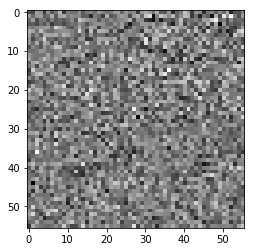

Epoch 1/2... Batch 500... Discriminator Loss: 0.5502... Generator Loss: 1.6928


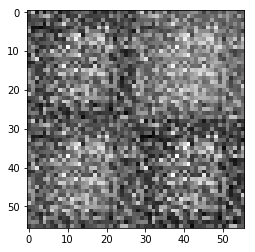

Epoch 1/2... Batch 1000... Discriminator Loss: 0.4363... Generator Loss: 2.7983


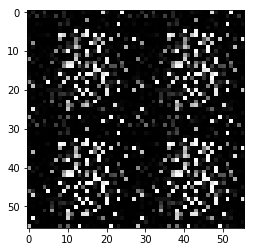

Epoch 1/2... Batch 1500... Discriminator Loss: 0.3363... Generator Loss: 9.6894


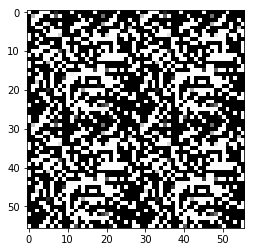

Epoch 2/2... Batch 0... Discriminator Loss: 0.4045... Generator Loss: 3.0704


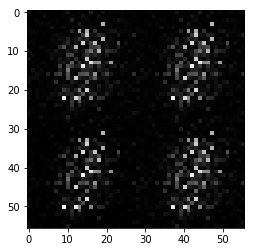

Epoch 2/2... Batch 500... Discriminator Loss: 0.4537... Generator Loss: 2.4884


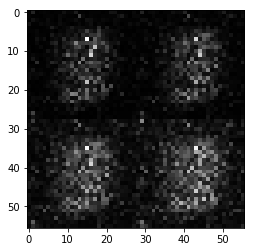

Epoch 2/2... Batch 1000... Discriminator Loss: 0.3739... Generator Loss: 3.4876


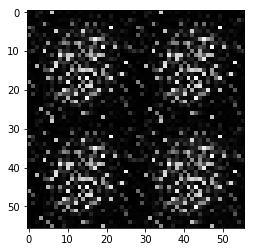

Epoch 2/2... Batch 1500... Discriminator Loss: 0.3570... Generator Loss: 3.6266


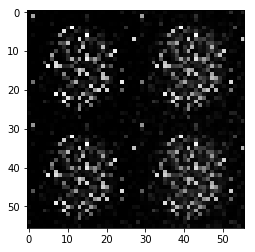

In [95]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.9


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/10... Batch 0... Discriminator Loss: 2.3022... Generator Loss: 0.5659


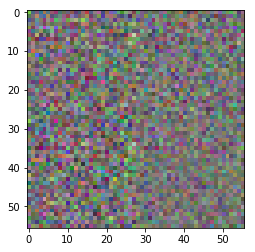

Epoch 1/10... Batch 500... Discriminator Loss: 0.5942... Generator Loss: 1.5455


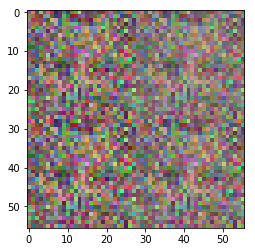

Epoch 1/10... Batch 1000... Discriminator Loss: 0.4575... Generator Loss: 3.1101


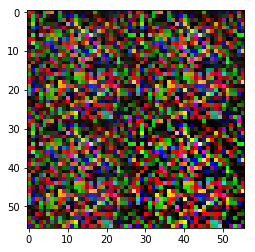

Epoch 1/10... Batch 1500... Discriminator Loss: 0.4750... Generator Loss: 2.9816


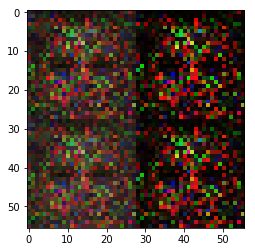

Epoch 1/10... Batch 2000... Discriminator Loss: 4.2111... Generator Loss: 6.8391


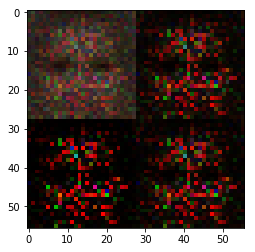

Epoch 1/10... Batch 2500... Discriminator Loss: 1.7942... Generator Loss: 1.0349


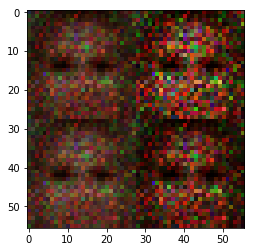

Epoch 1/10... Batch 3000... Discriminator Loss: 2.3580... Generator Loss: 0.5272


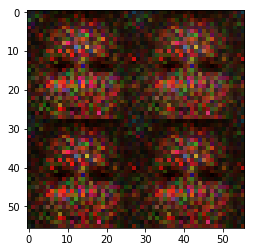

Epoch 1/10... Batch 3500... Discriminator Loss: 0.5478... Generator Loss: 6.6363


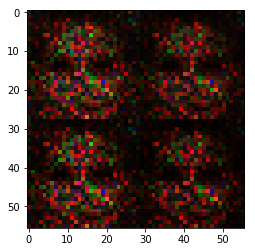

Epoch 1/10... Batch 4000... Discriminator Loss: 1.0999... Generator Loss: 1.1802


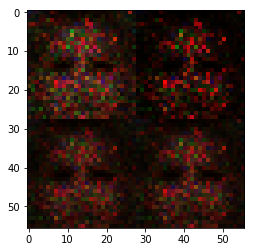

Epoch 1/10... Batch 4500... Discriminator Loss: 0.6611... Generator Loss: 1.5727


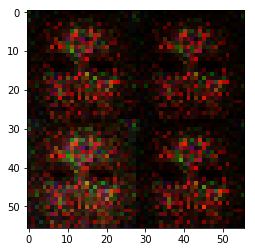

Epoch 1/10... Batch 5000... Discriminator Loss: 1.1967... Generator Loss: 3.3216


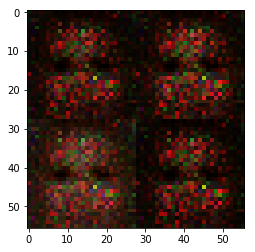

Epoch 1/10... Batch 5500... Discriminator Loss: 1.8835... Generator Loss: 0.7503


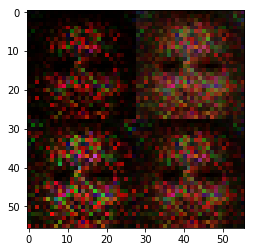

Epoch 1/10... Batch 6000... Discriminator Loss: 0.7653... Generator Loss: 1.3177


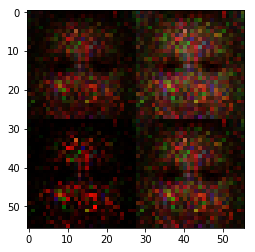

Epoch 2/10... Batch 0... Discriminator Loss: 0.6354... Generator Loss: 2.3663


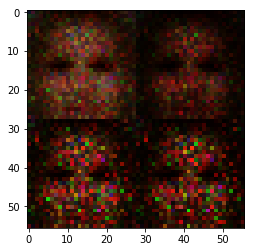

Epoch 2/10... Batch 500... Discriminator Loss: 0.9345... Generator Loss: 1.1009


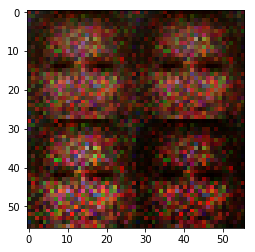

Epoch 2/10... Batch 1000... Discriminator Loss: 2.3232... Generator Loss: 0.2623


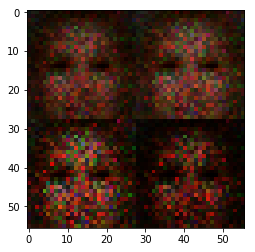

Epoch 2/10... Batch 1500... Discriminator Loss: 1.3514... Generator Loss: 0.9684


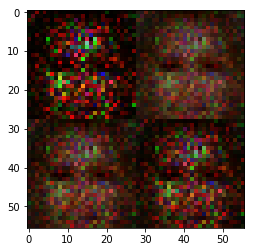

Epoch 2/10... Batch 2000... Discriminator Loss: 0.6011... Generator Loss: 1.9039


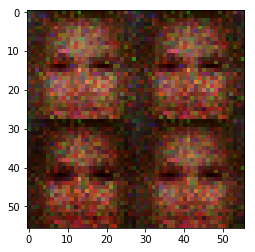

Epoch 2/10... Batch 2500... Discriminator Loss: 0.8875... Generator Loss: 1.9281


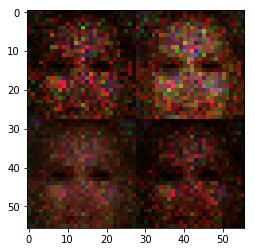

Epoch 2/10... Batch 3000... Discriminator Loss: 0.6104... Generator Loss: 2.6269


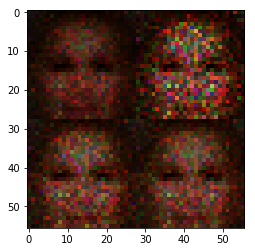

Epoch 2/10... Batch 3500... Discriminator Loss: 0.4926... Generator Loss: 2.9732


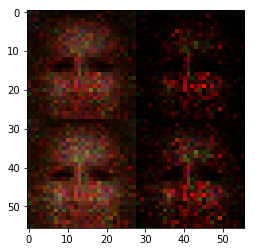

Epoch 2/10... Batch 4000... Discriminator Loss: 0.5327... Generator Loss: 2.9402


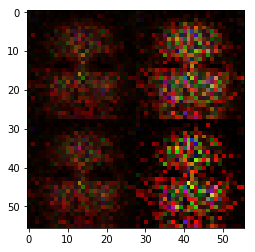

Epoch 2/10... Batch 4500... Discriminator Loss: 0.5400... Generator Loss: 3.4681


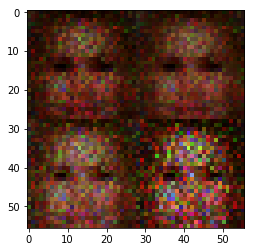

Epoch 2/10... Batch 5000... Discriminator Loss: 0.5315... Generator Loss: 2.2081


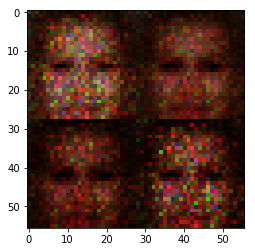

Epoch 2/10... Batch 5500... Discriminator Loss: 0.4743... Generator Loss: 3.4286


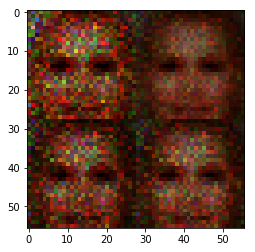

Epoch 2/10... Batch 6000... Discriminator Loss: 0.5011... Generator Loss: 2.2442


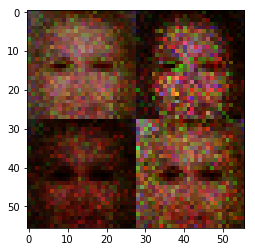

Epoch 3/10... Batch 0... Discriminator Loss: 0.4652... Generator Loss: 2.7932


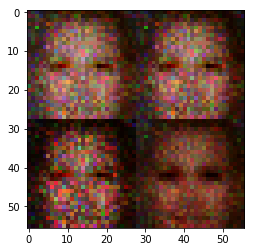

Epoch 3/10... Batch 500... Discriminator Loss: 0.5431... Generator Loss: 1.9950


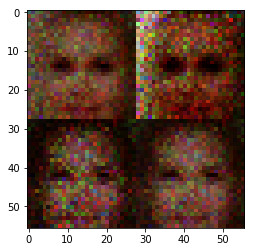

Epoch 3/10... Batch 1000... Discriminator Loss: 0.4858... Generator Loss: 2.3665


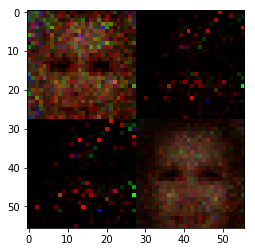

Epoch 3/10... Batch 1500... Discriminator Loss: 0.4994... Generator Loss: 2.5836


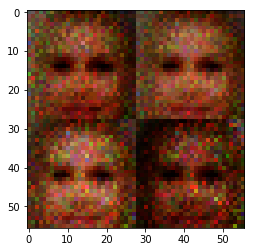

Epoch 3/10... Batch 2000... Discriminator Loss: 0.5238... Generator Loss: 2.8238


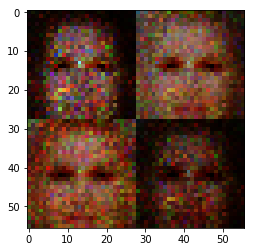

Epoch 3/10... Batch 2500... Discriminator Loss: 0.5233... Generator Loss: 3.8710


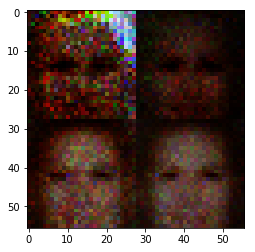

Epoch 3/10... Batch 3000... Discriminator Loss: 0.5803... Generator Loss: 2.0059


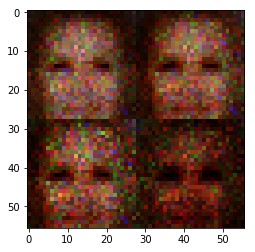

Epoch 3/10... Batch 3500... Discriminator Loss: 0.5108... Generator Loss: 2.2335


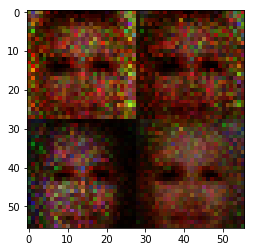

Epoch 3/10... Batch 4000... Discriminator Loss: 0.5427... Generator Loss: 2.3040


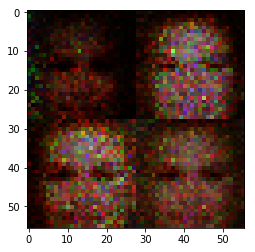

Epoch 3/10... Batch 4500... Discriminator Loss: 0.4780... Generator Loss: 2.6147


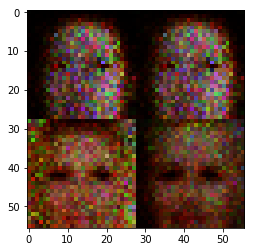

Epoch 3/10... Batch 5000... Discriminator Loss: 0.4553... Generator Loss: 3.2587


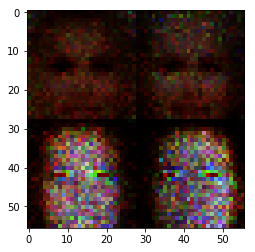

Epoch 3/10... Batch 5500... Discriminator Loss: 0.4329... Generator Loss: 3.5748


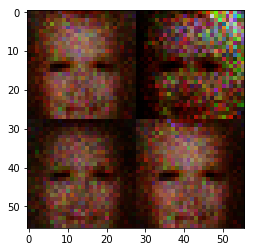

Epoch 3/10... Batch 6000... Discriminator Loss: 0.3968... Generator Loss: 3.9865


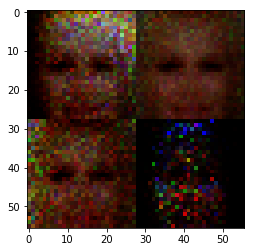

Epoch 4/10... Batch 0... Discriminator Loss: 0.4662... Generator Loss: 3.1001


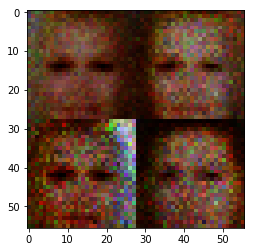

Epoch 4/10... Batch 500... Discriminator Loss: 0.4610... Generator Loss: 2.7425


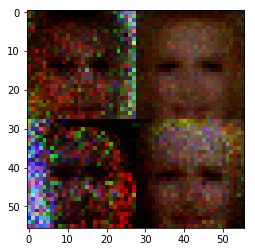

Epoch 4/10... Batch 1000... Discriminator Loss: 0.4880... Generator Loss: 2.4852


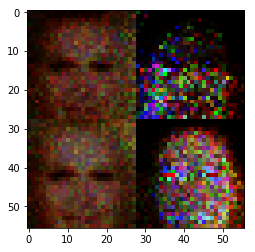

Epoch 4/10... Batch 1500... Discriminator Loss: 0.4596... Generator Loss: 3.2644


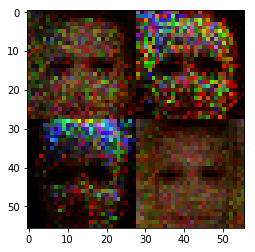

Epoch 4/10... Batch 2000... Discriminator Loss: 0.5405... Generator Loss: 2.5021


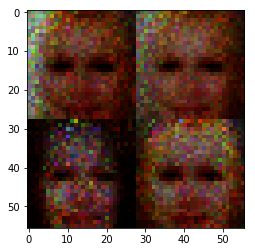

Epoch 4/10... Batch 2500... Discriminator Loss: 0.4262... Generator Loss: 5.6505


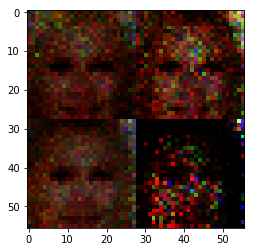

Epoch 4/10... Batch 3000... Discriminator Loss: 0.4960... Generator Loss: 2.8700


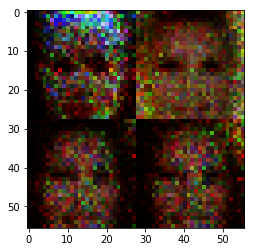

Epoch 4/10... Batch 3500... Discriminator Loss: 0.4458... Generator Loss: 3.8559


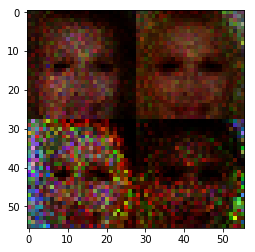

Epoch 4/10... Batch 4000... Discriminator Loss: 0.4597... Generator Loss: 3.2289


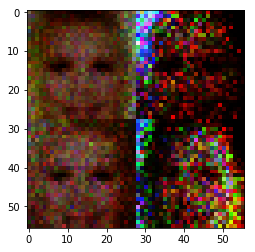

Epoch 4/10... Batch 4500... Discriminator Loss: 0.4305... Generator Loss: 3.1262


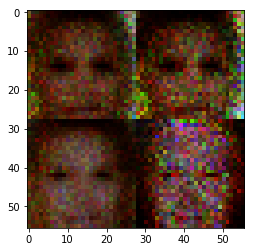

Epoch 4/10... Batch 5000... Discriminator Loss: 0.4243... Generator Loss: 3.1450


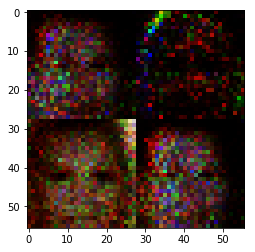

Epoch 4/10... Batch 5500... Discriminator Loss: 0.4379... Generator Loss: 3.3042


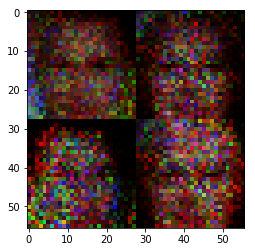

Epoch 4/10... Batch 6000... Discriminator Loss: 0.3995... Generator Loss: 3.6610


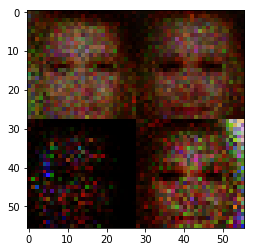

Epoch 5/10... Batch 0... Discriminator Loss: 0.4505... Generator Loss: 2.5852


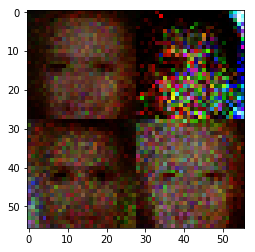

Epoch 5/10... Batch 500... Discriminator Loss: 0.4262... Generator Loss: 3.5623


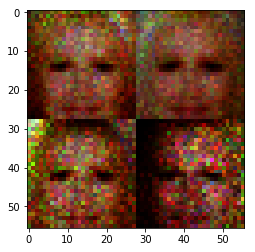

Epoch 5/10... Batch 1000... Discriminator Loss: 0.4478... Generator Loss: 2.9392


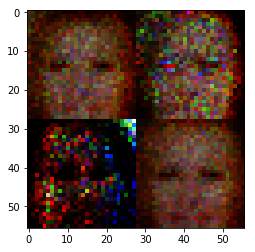

Epoch 5/10... Batch 1500... Discriminator Loss: 0.4731... Generator Loss: 2.6613


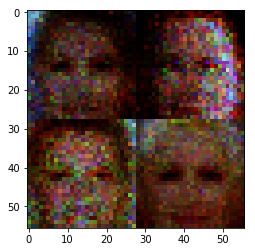

Epoch 5/10... Batch 2000... Discriminator Loss: 0.4879... Generator Loss: 3.3008


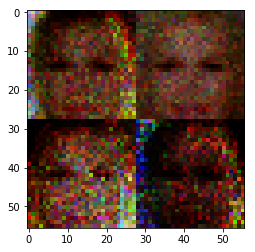

Epoch 5/10... Batch 2500... Discriminator Loss: 0.4030... Generator Loss: 3.4004


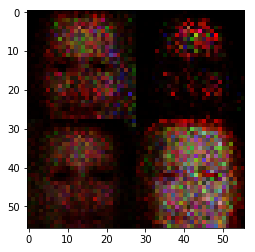

Epoch 5/10... Batch 3000... Discriminator Loss: 0.3994... Generator Loss: 4.7225


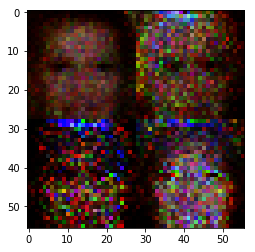

Epoch 5/10... Batch 3500... Discriminator Loss: 0.3960... Generator Loss: 4.4154


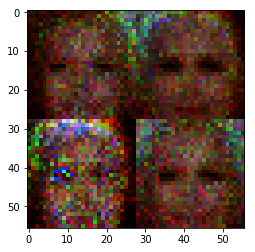

Epoch 5/10... Batch 4000... Discriminator Loss: 0.4403... Generator Loss: 3.8325


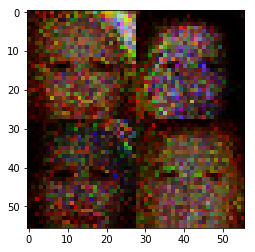

Epoch 5/10... Batch 4500... Discriminator Loss: 0.4184... Generator Loss: 3.1882


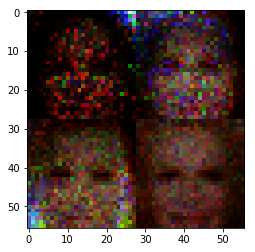

Epoch 5/10... Batch 5000... Discriminator Loss: 0.4282... Generator Loss: 4.1474


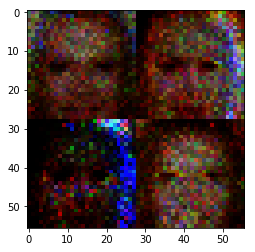

Epoch 5/10... Batch 5500... Discriminator Loss: 0.4183... Generator Loss: 3.8477


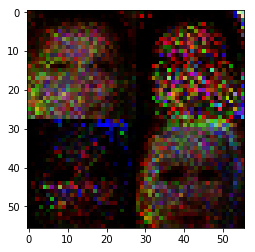

Epoch 5/10... Batch 6000... Discriminator Loss: 0.3948... Generator Loss: 4.1299


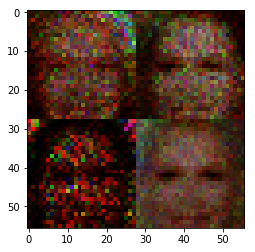

Epoch 6/10... Batch 0... Discriminator Loss: 0.4037... Generator Loss: 4.3253


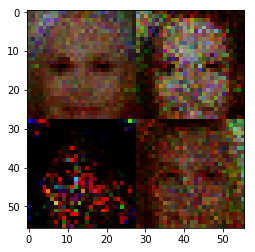

Epoch 6/10... Batch 500... Discriminator Loss: 0.5413... Generator Loss: 2.3626


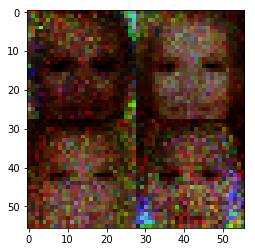

Epoch 6/10... Batch 1000... Discriminator Loss: 0.4440... Generator Loss: 2.9265


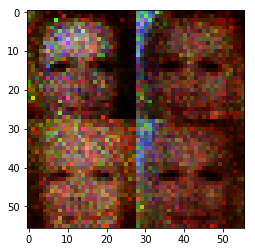

Epoch 6/10... Batch 1500... Discriminator Loss: 0.3911... Generator Loss: 4.6514


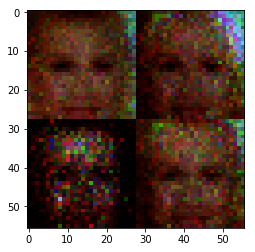

Epoch 6/10... Batch 2000... Discriminator Loss: 0.4105... Generator Loss: 4.0240


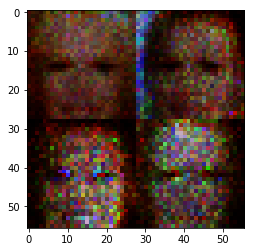

Epoch 6/10... Batch 2500... Discriminator Loss: 0.3795... Generator Loss: 4.1963


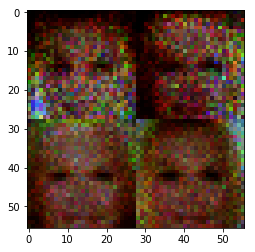

Epoch 6/10... Batch 3000... Discriminator Loss: 0.4358... Generator Loss: 3.1061


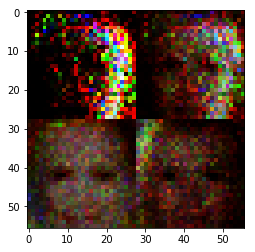

Epoch 6/10... Batch 3500... Discriminator Loss: 0.4197... Generator Loss: 3.6394


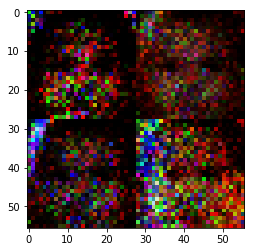

Epoch 6/10... Batch 4000... Discriminator Loss: 0.4414... Generator Loss: 2.8281


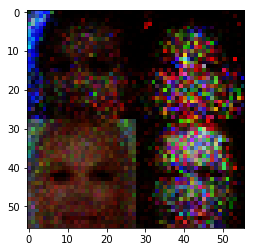

Epoch 6/10... Batch 4500... Discriminator Loss: 0.3849... Generator Loss: 4.1611


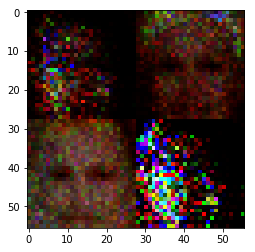

Epoch 6/10... Batch 5000... Discriminator Loss: 0.3916... Generator Loss: 4.9326


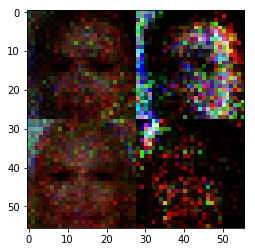

Epoch 6/10... Batch 5500... Discriminator Loss: 0.3653... Generator Loss: 5.4335


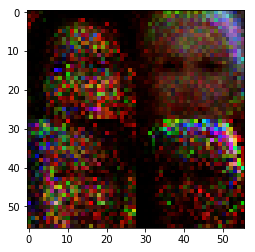

Epoch 6/10... Batch 6000... Discriminator Loss: 0.3530... Generator Loss: 5.5558


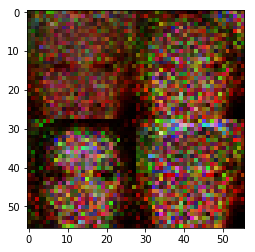

Epoch 7/10... Batch 0... Discriminator Loss: 0.3971... Generator Loss: 3.7656


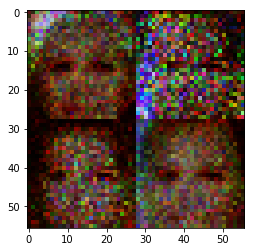

Epoch 7/10... Batch 500... Discriminator Loss: 0.4579... Generator Loss: 5.5645


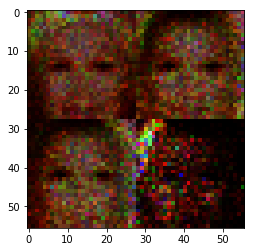

Epoch 7/10... Batch 1000... Discriminator Loss: 0.3827... Generator Loss: 4.4421


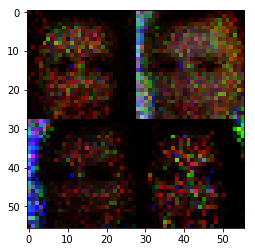

Epoch 7/10... Batch 1500... Discriminator Loss: 0.3685... Generator Loss: 5.9667


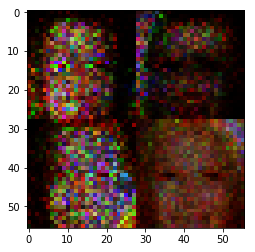

Epoch 7/10... Batch 2000... Discriminator Loss: 0.3917... Generator Loss: 4.2721


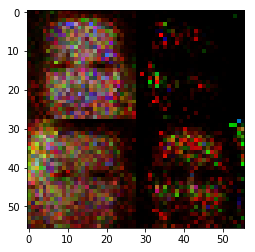

Epoch 7/10... Batch 2500... Discriminator Loss: 0.3493... Generator Loss: 5.8648


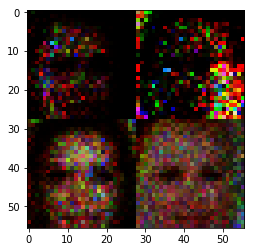

Epoch 7/10... Batch 3000... Discriminator Loss: 0.3585... Generator Loss: 4.9737


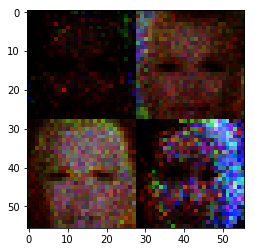

Epoch 7/10... Batch 3500... Discriminator Loss: 0.3603... Generator Loss: 5.4638


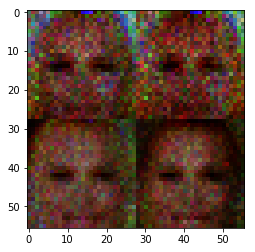

Epoch 7/10... Batch 4000... Discriminator Loss: 0.3498... Generator Loss: 5.8984


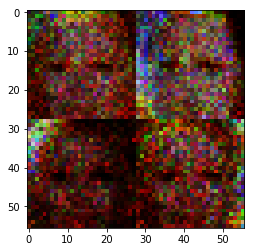

Epoch 7/10... Batch 4500... Discriminator Loss: 0.3568... Generator Loss: 6.0890


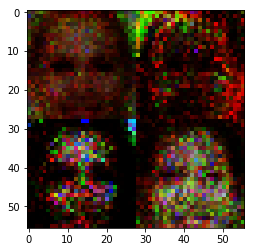

Epoch 7/10... Batch 5000... Discriminator Loss: 0.3577... Generator Loss: 7.7290


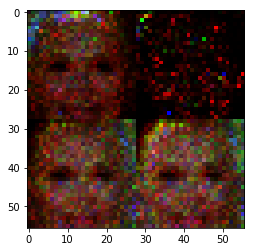

Epoch 7/10... Batch 5500... Discriminator Loss: 0.3930... Generator Loss: 7.0000


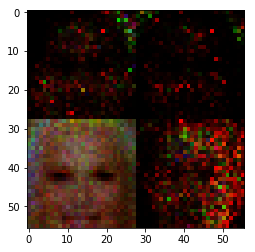

Epoch 7/10... Batch 6000... Discriminator Loss: 0.3503... Generator Loss: 5.0878


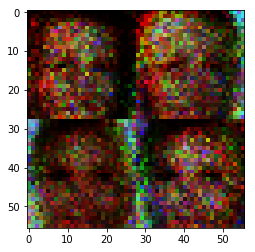

Epoch 8/10... Batch 0... Discriminator Loss: 0.3476... Generator Loss: 4.7790


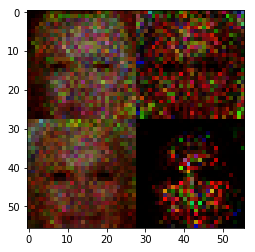

Epoch 8/10... Batch 500... Discriminator Loss: 0.3472... Generator Loss: 6.3657


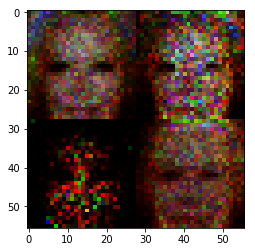

Epoch 8/10... Batch 1000... Discriminator Loss: 0.3525... Generator Loss: 4.9076


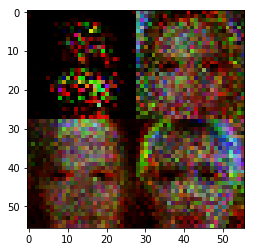

Epoch 8/10... Batch 1500... Discriminator Loss: 0.3465... Generator Loss: 4.9948


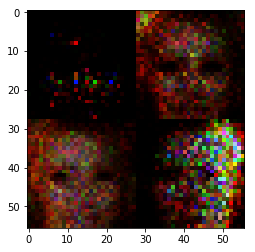

Epoch 8/10... Batch 2000... Discriminator Loss: 0.3540... Generator Loss: 5.8875


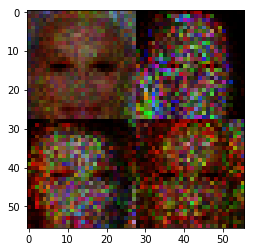

Epoch 8/10... Batch 2500... Discriminator Loss: 0.3854... Generator Loss: 3.4425


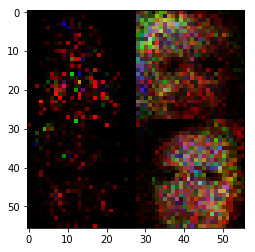

Epoch 8/10... Batch 3000... Discriminator Loss: 0.3493... Generator Loss: 7.7350


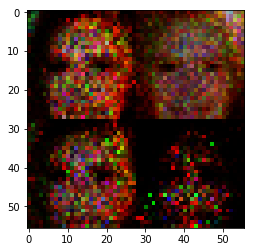

Epoch 8/10... Batch 3500... Discriminator Loss: 0.3466... Generator Loss: 7.2822


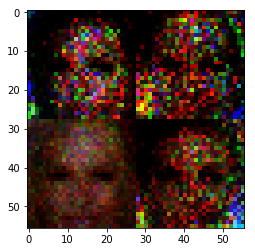

Epoch 8/10... Batch 4000... Discriminator Loss: 0.3542... Generator Loss: 5.0721


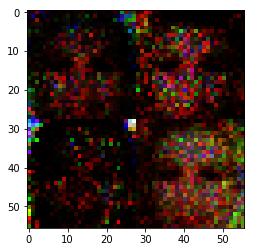

Epoch 8/10... Batch 4500... Discriminator Loss: 0.3488... Generator Loss: 8.1681


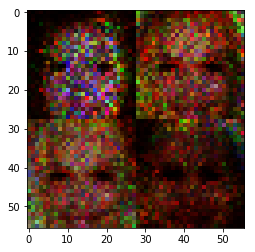

Epoch 8/10... Batch 5000... Discriminator Loss: 0.3372... Generator Loss: 5.1847


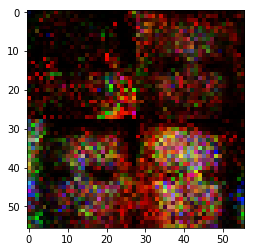

Epoch 8/10... Batch 5500... Discriminator Loss: 0.3436... Generator Loss: 6.5695


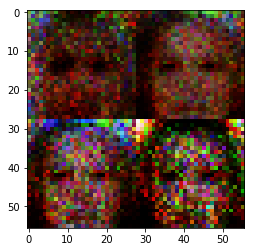

Epoch 8/10... Batch 6000... Discriminator Loss: 0.3390... Generator Loss: 5.0590


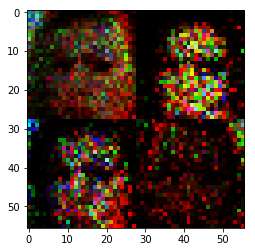

Epoch 9/10... Batch 0... Discriminator Loss: 0.3479... Generator Loss: 4.3386


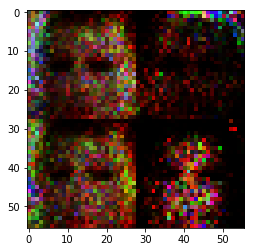

Epoch 9/10... Batch 500... Discriminator Loss: 0.3310... Generator Loss: 7.2336


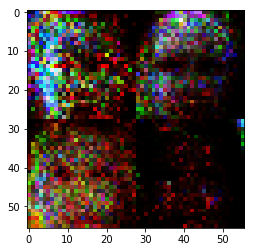

Epoch 9/10... Batch 1000... Discriminator Loss: 0.3356... Generator Loss: 6.0613


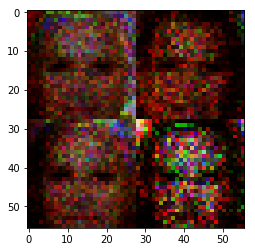

Epoch 9/10... Batch 1500... Discriminator Loss: 0.3319... Generator Loss: 7.4316


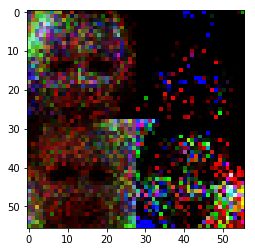

Epoch 9/10... Batch 2000... Discriminator Loss: 0.3350... Generator Loss: 6.8101


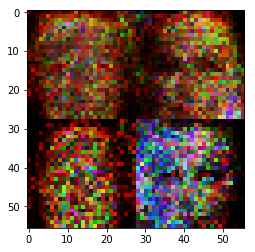

Epoch 9/10... Batch 2500... Discriminator Loss: 0.3314... Generator Loss: 6.1983


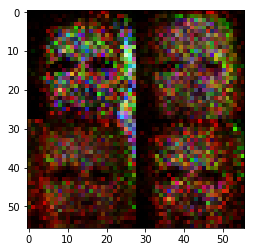

Epoch 9/10... Batch 3000... Discriminator Loss: 0.3313... Generator Loss: 6.1857


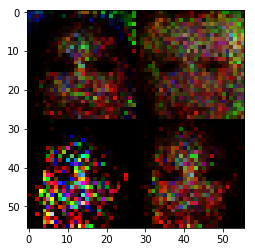

Epoch 9/10... Batch 3500... Discriminator Loss: 0.3322... Generator Loss: 6.1971


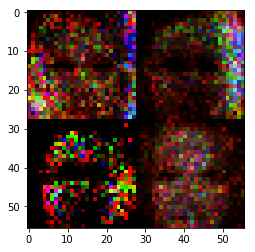

Epoch 9/10... Batch 4000... Discriminator Loss: 0.3498... Generator Loss: 7.6365


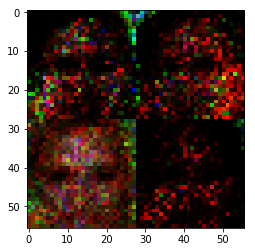

Epoch 9/10... Batch 4500... Discriminator Loss: 0.3311... Generator Loss: 7.4773


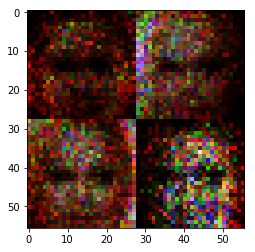

Epoch 9/10... Batch 5000... Discriminator Loss: 0.4032... Generator Loss: 3.5087


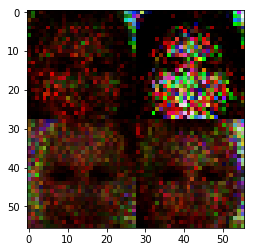

Epoch 9/10... Batch 5500... Discriminator Loss: 0.3367... Generator Loss: 6.0697


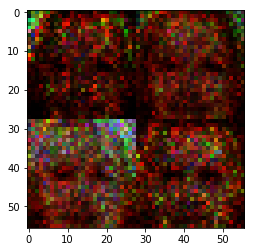

Epoch 9/10... Batch 6000... Discriminator Loss: 0.3299... Generator Loss: 6.4628


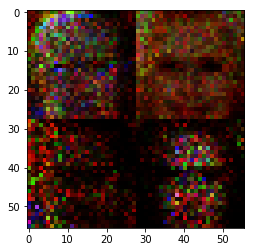

Epoch 10/10... Batch 0... Discriminator Loss: 0.3324... Generator Loss: 6.5694


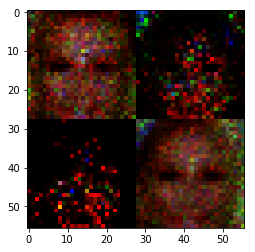

Epoch 10/10... Batch 500... Discriminator Loss: 0.3399... Generator Loss: 6.1804


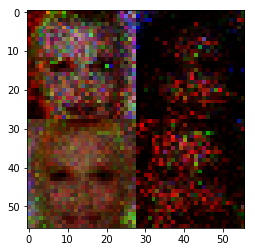

Epoch 10/10... Batch 1000... Discriminator Loss: 0.3344... Generator Loss: 6.7561


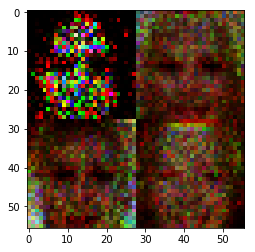

Epoch 10/10... Batch 1500... Discriminator Loss: 0.3502... Generator Loss: 4.6833


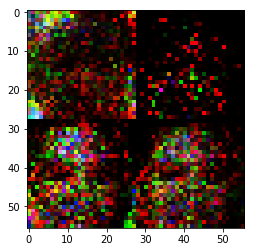

Epoch 10/10... Batch 2000... Discriminator Loss: 0.3313... Generator Loss: 6.9218


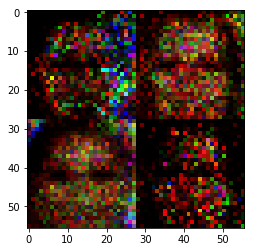

Epoch 10/10... Batch 2500... Discriminator Loss: 0.3292... Generator Loss: 8.5488


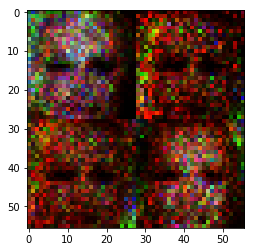

In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.9


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.